In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [2]:
df = pandas.read_csv('winequality-red.csv',sep=';')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

<IPython.core.display.Javascript object>


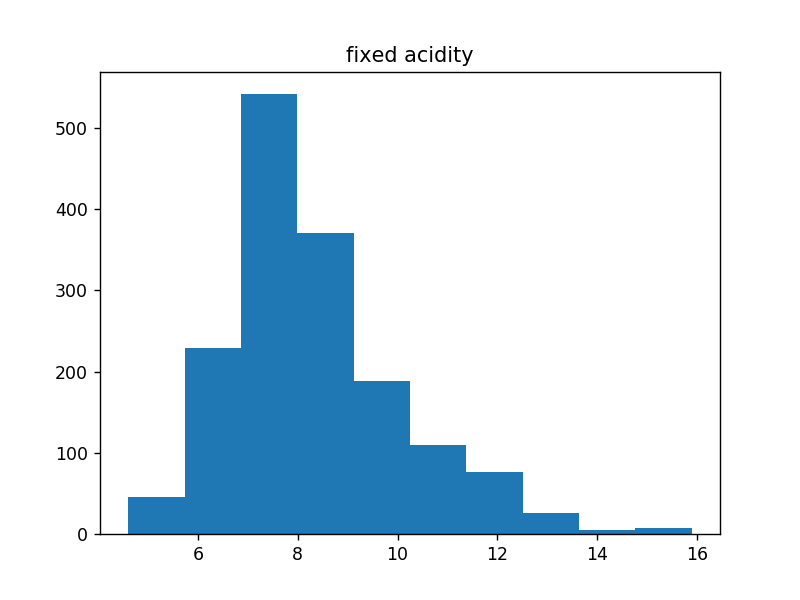

In [3]:
feature = df.values[:,0]
name = df.columns[0]
plt.figure()
plt.title(name)
plt.hist(feature)
plt.show()

<IPython.core.display.Javascript object>


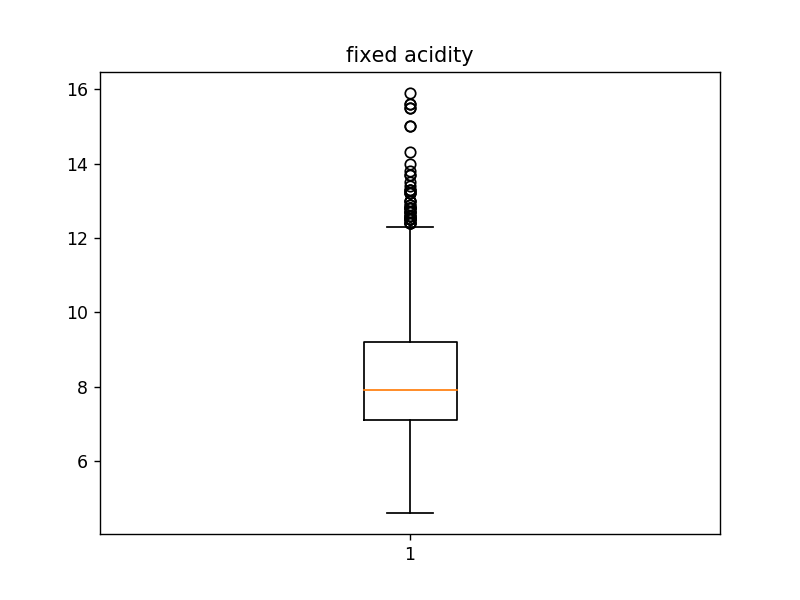

In [4]:
feature = df.values[:,0]
name = df.columns[0]
plt.figure()
plt.title(name)
plt.boxplot(feature)
plt.show()

<IPython.core.display.Javascript object>


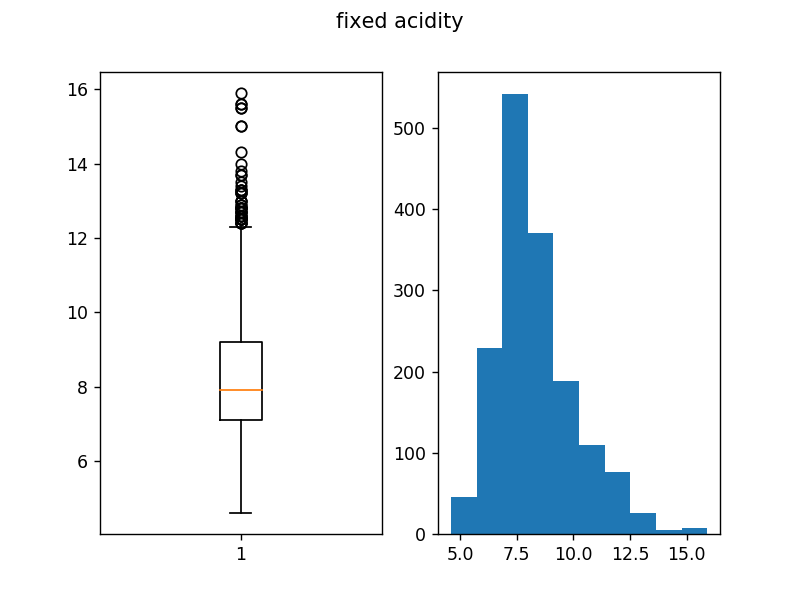

In [5]:
feature = df.values[:,0]
name = df.columns[0]
plt.figure()
plt.subplot(1,2,1)
plt.boxplot(feature)
plt.subplot(1,2,2)
plt.hist(feature)
plt.suptitle(name)
plt.show()

In [6]:
print(df.columns)
print(df.columns[8])
print(df.columns[10])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
pH
alcohol


<IPython.core.display.Javascript object>


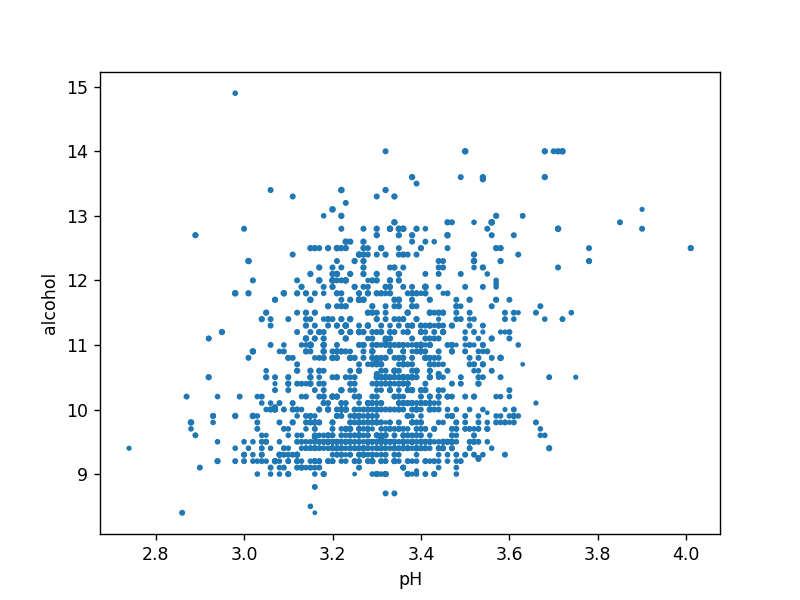

In [7]:
plt.figure()
plt.scatter( df.values[:,8], df.values[:,10],df.values[:,-1] )
plt.xlabel(df.columns[8])
plt.ylabel(df.columns[10])
plt.show()

<IPython.core.display.Javascript object>


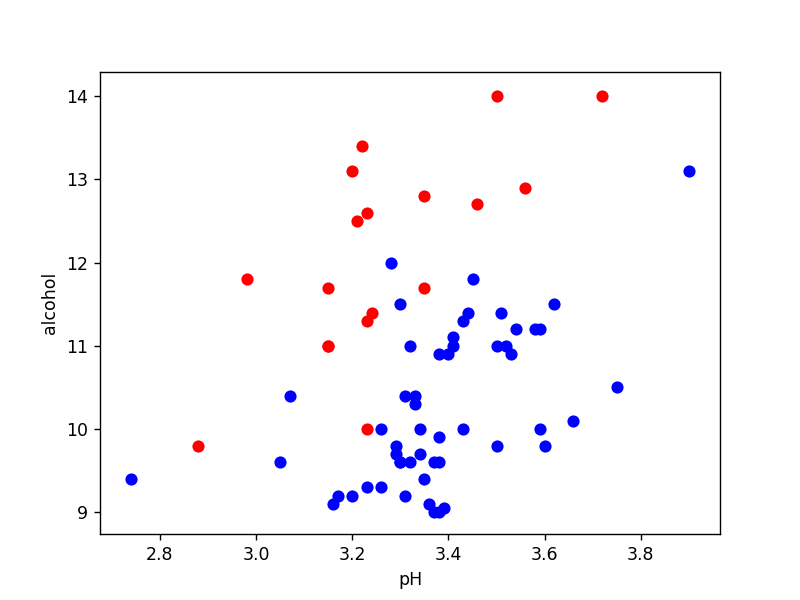

In [8]:
q = df.values[:,-1]
plt.figure()
plt.scatter( df.values[q==4,8], df.values[q==4,10],c='blue' )
plt.scatter( df.values[q==8,8], df.values[q==8,10],c='red' )
plt.xlabel(df.columns[8])
plt.ylabel(df.columns[10])
plt.show()

<IPython.core.display.Javascript object>


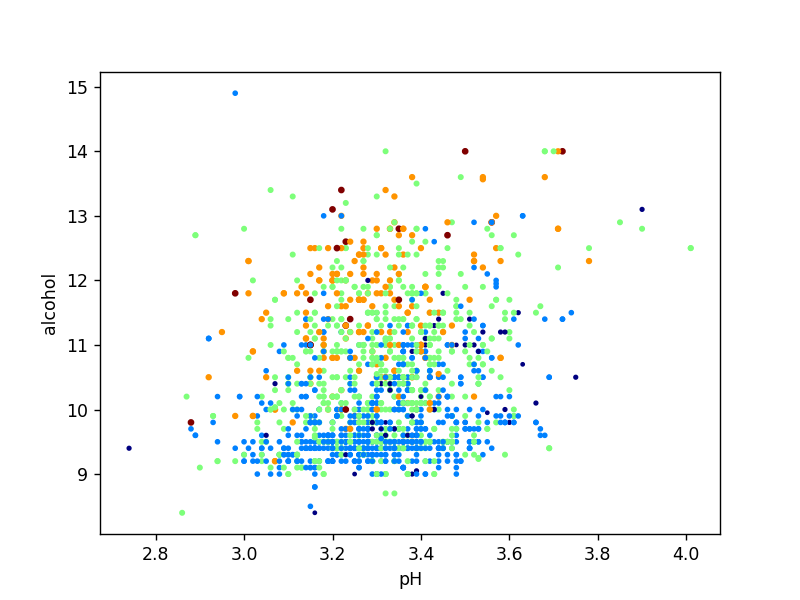

In [9]:
q = df.values[:,-1]
plt.figure()
plt.scatter( df.values[:,8], df.values[:,10],df.values[:,-1],c=df.values[:,-1],cmap='jet',vmin=4,vmax=8 )
plt.xlabel(df.columns[8])
plt.ylabel(df.columns[10])
plt.show()

In [10]:
print(df.columns)
print(df.columns[8])
print(df.columns[10])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
pH
alcohol


In [11]:
ph = df.values[:,8]
alcohol = df.values[:,10]
quality = df.values[:,-1]
print(np.unique(quality))

[3. 4. 5. 6. 7. 8.]


<IPython.core.display.Javascript object>


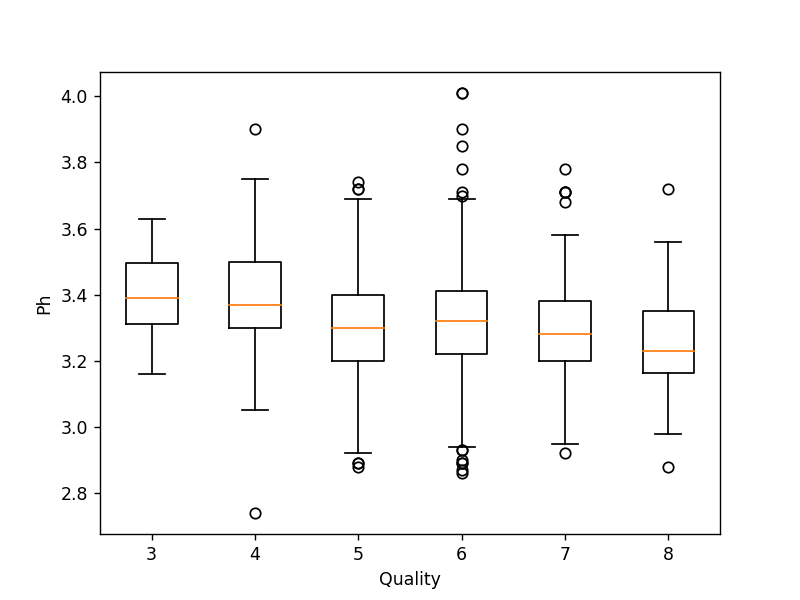

In [12]:
plt.figure()
plt.boxplot( [ph[quality==3],ph[quality==4],ph[quality==5],ph[quality==6],ph[quality==7],ph[quality==8]] )
plt.xticks([1,2,3,4,5,6],['3','4','5','6','7','8'])
plt.xlabel('Quality')
plt.ylabel('Ph')
plt.show()

<IPython.core.display.Javascript object>


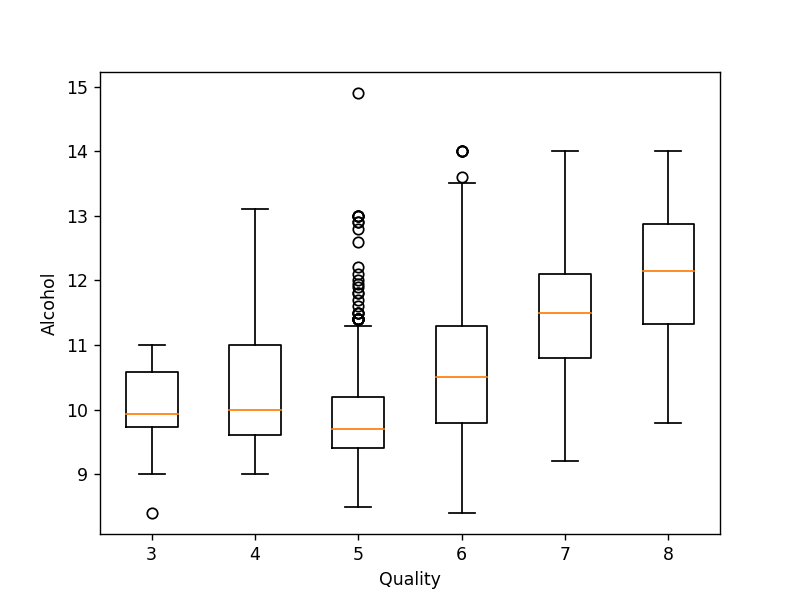

In [13]:
plt.figure()
plt.boxplot( [alcohol[quality==3],alcohol[quality==4],alcohol[quality==5],alcohol[quality==6],alcohol[quality==7],alcohol[quality==8]] )
plt.xticks([1,2,3,4,5,6],['3','4','5','6','7','8'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# Medidas de dependencia

In [14]:
df.columns

for i in range(len(df.columns)):
    print(df.columns[i])
    print('  Promedio:',np.mean(df.values[:,i]))
    print('  Desv estándar:',np.std(df.values[:,i]))
    print('  Mediana:',np.median(df.values[:,i]))

fixed acidity
  Promedio: 8.31963727329581
  Desv estándar: 1.7405518001102729
  Mediana: 7.9
volatile acidity
  Promedio: 0.5278205128205128
  Desv estándar: 0.17900370424469014
  Mediana: 0.52
citric acid
  Promedio: 0.2709756097560976
  Desv estándar: 0.19474021445233364
  Mediana: 0.26
residual sugar
  Promedio: 2.53880550343965
  Desv estándar: 1.4094871124880495
  Mediana: 2.2
chlorides
  Promedio: 0.08746654158849279
  Desv estándar: 0.04705058260331571
  Mediana: 0.079
free sulfur dioxide
  Promedio: 15.874921826141339
  Desv estándar: 10.45688561493072
  Mediana: 14.0
total sulfur dioxide
  Promedio: 46.46779237023139
  Desv estándar: 32.88503665178374
  Mediana: 38.0
density
  Promedio: 0.996746679174484
  Desv estándar: 0.0018867437008323923
  Mediana: 0.99675
pH
  Promedio: 3.3111131957473416
  Desv estándar: 0.15433818141060165
  Mediana: 3.31
sulphates
  Promedio: 0.6581488430268917
  Desv estándar: 0.16945396724179546
  Mediana: 0.62
alcohol
  Promedio: 10.42298311444652

In [19]:
# Matriz de covarianza
c = np.cov(df.values.transpose())
df_cov = pandas.DataFrame(c,index=df.columns,columns=df.columns)
df_cov.to_csv('cov.csv')
print(df_cov)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              3.031416         -0.079851     0.227820   
volatile acidity          -0.079851          0.032062    -0.019272   
citric acid                0.227820         -0.019272     0.037947   
residual sugar             0.281756          0.000484     0.039434   
chlorides                  0.007679          0.000517     0.001869   
free sulfur dioxide       -2.800921         -0.019674    -0.124252   
total sulfur dioxide      -6.482346          0.450426     0.227697   
density                    0.002195          0.000007     0.000134   
pH                        -0.183586          0.006495    -0.016298   
sulphates                  0.054010         -0.007921     0.010328   
alcohol                   -0.114421         -0.038600     0.022815   
quality                    0.174424         -0.056476     0.035612   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [20]:
# Matriz de covarianza
m = np.corrcoef(df.values.transpose().astype(float))
df_corr = pandas.DataFrame(m,index=df.columns,columns=df.columns)
df_corr.to_csv('corr.csv')
print(df_corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    